## Task 1: Select the top 5% of the most popular movies

Top 5% movies saved to ../../data/MovieSummaries/top_5_percent_movies.tsv


/var/folders/s6/4zg7l1513jd7mw71zl5ldt_80000gp/T/ipykernel_88249/2274101317.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to fit x-axis labels


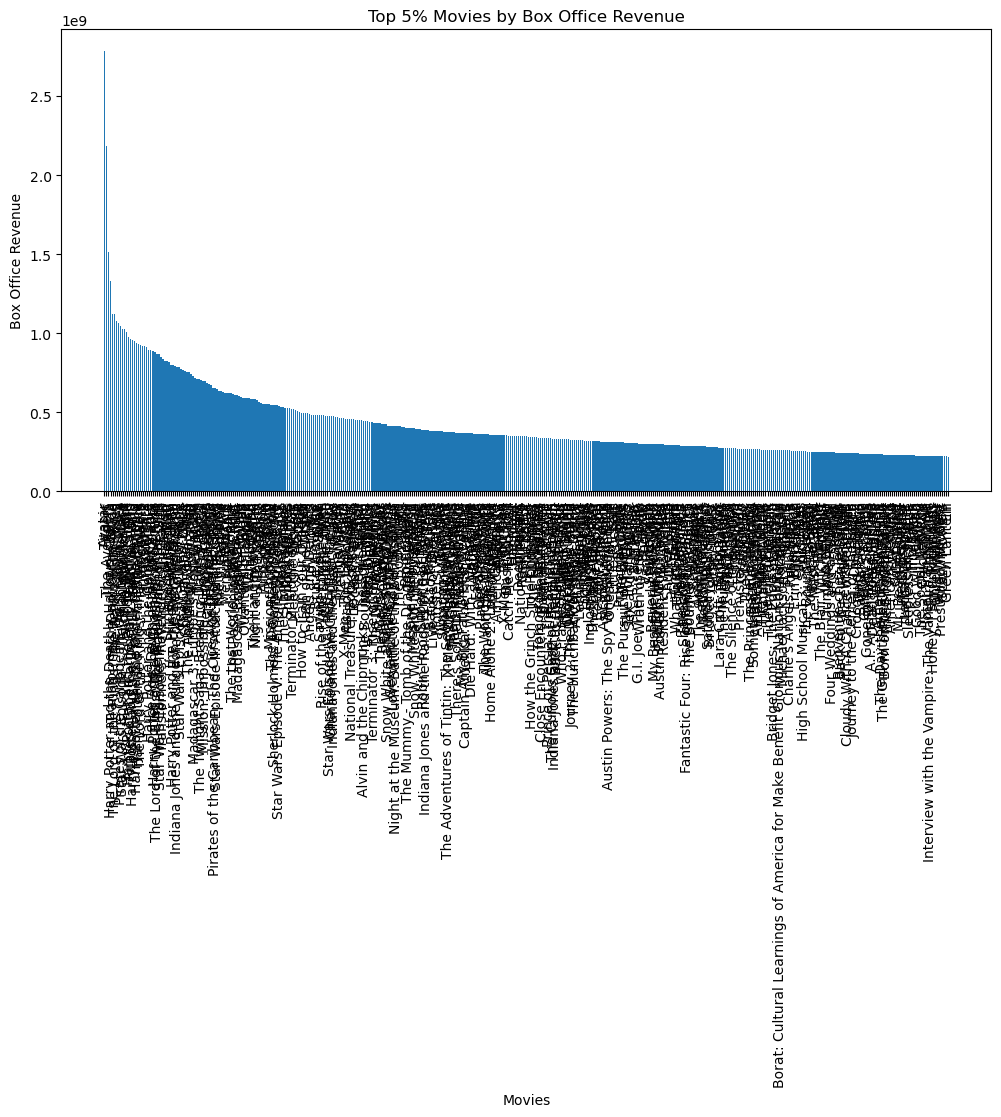

the most successful movie is:  Grease


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# run the moviesuccess.py file
%run moviesuccess.py
# Load the top 5% movies file
top_5_percent_movies_df = pd.read_csv("../../data/MovieSummaries/top_5_percent_movies.tsv", sep='\t')

# Plot the top 5% most successful movies by box office revenue
def plot_top_5_percent_movies(data):
    """Plots a bar chart of movies by box office revenue."""
    # Sort movies by box office revenue for a cleaner visualization
    data = data.sort_values(by="Box office revenue", ascending=False)

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.bar(data["Name"], data["Box office revenue"])
    plt.xticks(rotation=90)  # Rotate movie names on the x-axis for better readability
    plt.xlabel("Movies")
    plt.ylabel("Box Office Revenue")
    plt.title("Top 5% Movies by Box Office Revenue")
    plt.tight_layout()  # Adjust layout to fit x-axis labels

    plt.show()

# Execute the plot function
plot_top_5_percent_movies(top_5_percent_movies_df)

print("the most successful movie is: ", top_5_percent_movies_df.iloc[0].Name)


## Task 2: Correlation Between Actor Presence and Box Office Revenue


In [9]:
character_metadata_df = pd.read_csv("../../data/MovieSummaries/character.metadata.tsv", sep='\t')

# Merge the two dataframes on "Wikipedia movie ID" to get only the characters from top 5% movies
top_10_movies_with_characters = pd.merge(top_5_percent_movies_df,
                                        character_metadata_df,
                                        left_on="Wikipedia movie ID", 
                                        right_on="Wikipedia movie ID")

# Count the number of appearances for each actor in the top 5% movies
actor_counts = top_10_movies_with_characters["Actor name"].value_counts().reset_index()
actor_counts.columns = ["Actor name", "Appearances in Top 5% Movies"]

# Display the top actors with the most appearances
actor_counts.head(10)


,Actor name,Appearances in Top 5% Movies
0,Tom Hanks,18
1,Samuel L. Jackson,17
2,Conrad Vernon,16
3,Tom Cruise,16
4,John Ratzenberger,14
5,Frank Welker,14
6,Bruce Willis,13
7,Warwick Davis,13
8,Robin Williams,13
9,Gary Oldman,13


In [54]:
# Load the required datasets
movies_df = pd.read_csv("../../data/MovieSummaries/movie.metadata.tsv", sep='\t')
character_metadata_df = pd.read_csv("../../data/MovieSummaries/character.metadata.tsv", sep='\t')

# Filter the actors who appeared in at least 10 of the top 10% most successful movies
top_actors = actor_counts[actor_counts["Appearances in Top 5% Movies"] >= 10]["Actor name"]

# Merge character data with movie metadata to get box office revenue
merged_data = pd.merge(character_metadata_df, movies_df, on="Wikipedia movie ID")

# Filter for movies featuring top actors
top_actor_movies = merged_data[merged_data["Actor name"].isin(top_actors)]

# Calculate average box office revenue for movies with each top actor
actor_avg_revenue = top_actor_movies.groupby("Actor name")["Box office revenue"].mean().reset_index()
actor_avg_revenue.columns = ["Actor name", "Average Revenue with Actor"]

# Calculate the overall average box office revenue for movies without each top actor
movies_without_top_actors = movies_df[~movies_df["Wikipedia movie ID"].isin(top_actor_movies["Wikipedia movie ID"])]
overall_avg_revenue = movies_without_top_actors["Box office revenue"].mean()

# Add a column for "Average Revenue without Actor" to the table
actor_avg_revenue["Average Revenue without Actor"] = overall_avg_revenue

# Display the results
actor_avg_revenue


,Actor name,Average Revenue with Actor,Average Revenue without Actor
0,Alan Rickman,3.520243e+08,3.694136e+07
1,Ben Stiller,1.522222e+08,3.694136e+07
2,Bruce Willis,1.242830e+08,3.694136e+07
3,Cameron Diaz,2.193350e+08,3.694136e+07
4,Christopher Knights,6.842225e+08,3.694136e+07
5,Conrad Vernon,5.756707e+08,3.694136e+07
6,Eddie Murphy,1.929533e+08,3.694136e+07
7,Frank Welker,1.686466e+08,3.694136e+07
8,Gary Oldman,2.670824e+08,3.694136e+07
9,Harrison Ford,1.811090e+08,3.694136e+07


## Task 3: Top genres for each decade since 1960

#### 3.1: clean the release dates and separate films by decade

In [ ]:
# Convert the "Movie_release_date" to datetime and extract the decade
# Step 1: Use regex to extract the first four digits as the year
movies_df["Release_year"] = movies_df["Release date"].str.extract(r'(\d{4})')[0]
# Step 2: Convert the extracted year to numeric, which will handle any remaining non-numeric values
movies_df["Release_year"] = pd.to_numeric(movies_df["Release_year"], errors='coerce')

# Step 3: Drop rows where "Release_year" is still NaN (meaning no valid year was extracted)
movies_df = movies_df.dropna(subset=["Release_year"])

# Convert "Release_year" to an integer for easier analysis
movies_df["Release_year"] = movies_df["Release_year"].astype(int)

# Filter movies from 1960 onward and remove rows without revenue information
moviesss_df = movies_df[movies_df["Release_year"] >= 1960]
moviesss_df["Decade"] = (movies_df["Release_year"] // 10 * 10).astype("Int64")
moviesss_df = moviesss_df.dropna(subset=["Box office revenue"])

# Create a dataframe for the top 10 most successful movies of each decade
top_movies_by_decade = moviesss_df.groupby("Decade").apply(
    lambda x: x.nlargest(10, "Box office revenue")[["Wikipedia movie ID", "Genres"]]).reset_index(drop=True)


/var/folders/s6/4zg7l1513jd7mw71zl5ldt_80000gp/T/ipykernel_68855/4049653012.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviesss_df["Decade"] = (movies_df["Release_year"] // 10 * 10).astype("Int64")
/var/folders/s6/4zg7l1513jd7mw71zl5ldt_80000gp/T/ipykernel_68855/4049653012.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_movies_by_decade = moviesss_df.groupby("Decade").apply(


array(['{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}',
       '{"/m/04xvh5": "Costume drama", "/m/082gq": "War film", "/m/06l3bl": "Epic", "/m/04xvlr": "Period piece", "/m/07s9rl0": "Drama", "/m/060__y": "Film adaptation"}',
       '{"/m/0hj3myq": "Children\'s/Family", "/m/04t36": "Musical", "/m/01hmnh": "Fantasy", "/m/01z4y": "Comedy", "/m/07s9rl0": "Drama", "/m/0hqxf": "Family Film", "/m/0hj3myc": "Children\'s Fantasy"}',
       ...,
       '{"/m/0hj3mt0": "Alien Film", "/m/06n90": "Science Fiction", "/m/0hqxf": "Family Film", "/m/01z4y": "Comedy", "/m/03k9fj": "Adventure"}',
       '{"/m/0gf28": "Parody", "/m/09n5t_": "Americana", "/m/01z4y": "Comedy"}',
       '{"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic thriller", "/m/09blyk": "Psychological thriller", "/m/02wtdps": "Crime Thriller", "/m/05bh16v": "Courtroom Drama"}'],
      dtype=object)

#### 3.2: clean the genre

In [74]:
def extract_genres(genre_str):
    try:
        # Safely evaluate the dictionary-like string to convert it to a Python dictionary
        genre_dict = ast.literal_eval(genre_str)
        # Extract the values (genre names) from the dictionary
        return list(genre_dict.values())
    except (ValueError, SyntaxError):
        # Return an empty list if there is any parsing error
        return []

# Apply the extraction function to the "Genres" column
moviesss_df["Genres_cleaned"] = moviesss_df["Genres"].apply(extract_genres)

# Display the cleaned genre column to verify
moviesss_df.count()

Wikipedia movie ID    7259
Freebase movie ID     7259
Name                  7259
Release date          7259
Box office revenue    7259
Runtime               7189
Languages             7259
Countries             7259
Genres                7259
Release_year          7259
Decade                7259
Genres_cleaned        7259
dtype: int64

#### 3.3: plot the top genres for each decade

/var/folders/s6/4zg7l1513jd7mw71zl5ldt_80000gp/T/ipykernel_68855/3530085578.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_genres_by_decade = genre_counts_by_decade.groupby("Decade").apply(lambda x: x.nlargest(4, "Frequency")).reset_index(drop=True)


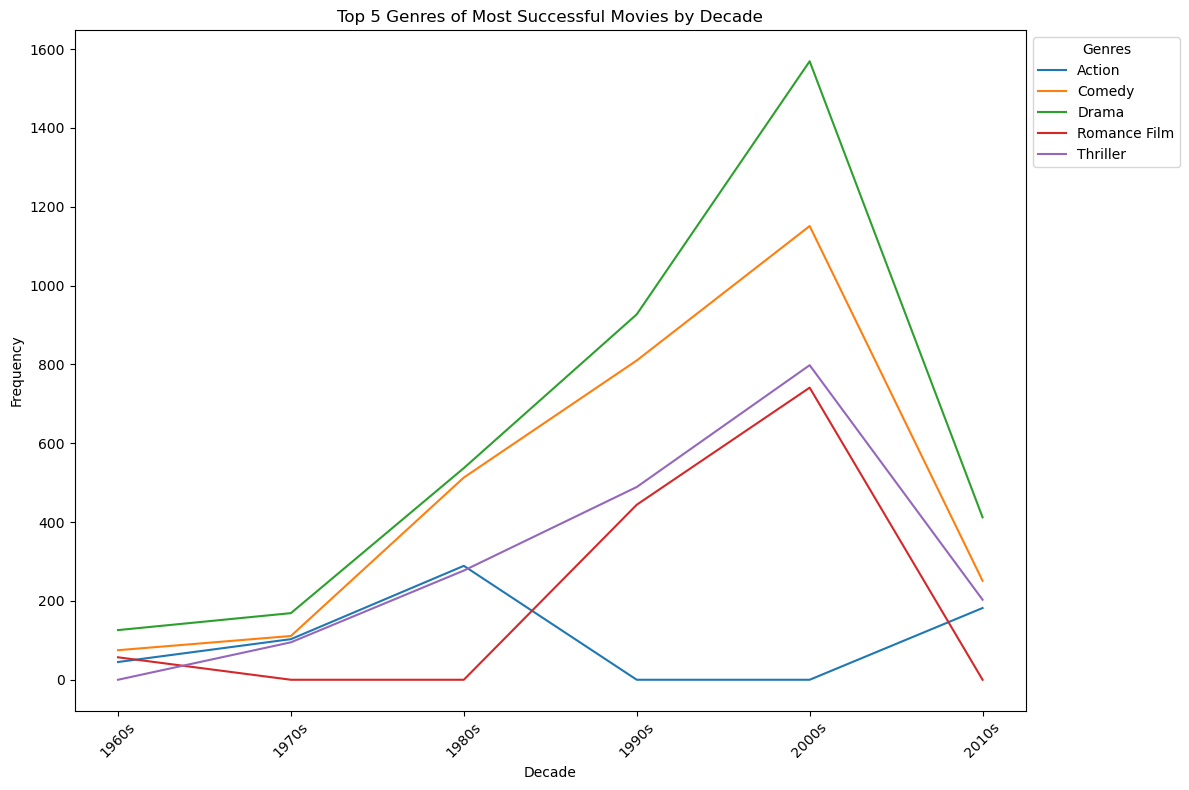

In [79]:
# Step 1: Explode the cleaned genres column to have one genre per row
movies_df_exploded = moviesss_df.explode("Genres_cleaned")

# Step 2: Calculate genre frequencies by decade
# First, group movies into decades
movies_df_exploded["Decade"] = (movies_df_exploded["Release_year"] // 10 * 10).astype(int)

# Count occurrences of each genre within each decade
genre_counts_by_decade = movies_df_exploded.groupby(["Decade", "Genres_cleaned"]).size().reset_index(name="Frequency")

# Step 3: Filter for the top 5 genres in each decade
top_5_genres_by_decade = genre_counts_by_decade.groupby("Decade").apply(lambda x: x.nlargest(4, "Frequency")).reset_index(drop=True)

# Step 4: Prepare data for plotting
# Pivot data to have each genre as a separate column for easy line plotting
genre_trends = top_5_genres_by_decade.pivot(index="Decade", columns="Genres_cleaned", values="Frequency").fillna(0)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot each genre trend line
for genre in genre_trends.columns:
    plt.plot(genre_trends.index, genre_trends[genre], label=genre)

plt.xlabel("Decade")
plt.ylabel("Frequency")
plt.title("Top 5 Genres of Most Successful Movies by Decade")
plt.legend(title="Genres", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(genre_trends.index, [f"{int(dec)}s" for dec in genre_trends.index], rotation=45)
plt.tight_layout()
plt.show()
